## 1. 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import keras
from IPython.display import display
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


## 2. 데이터 불러오기

In [2]:
banktest = pd.read_csv("dataset/credit_train_kor2.csv")

In [3]:
banktest.head(20)

,대출 ID,고객 ID,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6,0,215308,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13,1,122170,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15,0,193306,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4,0,437171,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20,0,669560,1021460.0,0.0,0.0


In [4]:
banktest.columns

Index(['대출 ID', '고객 ID', '대출 상태', '현재 대출 총액', '기간', '신용점수', '연소득', '현직업 근속연수',
       '거주지 소유 여부', '대출 목적', '월별 부채', '신용 연도', '마지막 연체 이후 개월 수', '보유 계좌 개수',
       '신용문제 발생 횟수', '현재 신용 잔고', '최대 신용 잔고', '파산 횟수', '재산차압권'],
      dtype='object')

### * 데이터 결측치 개수확인

In [5]:
banktest.isnull().sum()

대출 ID                 0
고객 ID                 0
대출 상태                 0
현재 대출 총액              0
기간                    0
신용점수              19154
연소득               19154
현직업 근속연수           4222
거주지 소유 여부             0
대출 목적                 0
월별 부채                 0
신용 연도                 0
마지막 연체 이후 개월 수    53141
보유 계좌 개수              0
신용문제 발생 횟수            0
현재 신용 잔고              0
최대 신용 잔고              2
파산 횟수               204
재산차압권                10
dtype: int64

### * 데이터 이상치 확인

#### matplotlib 설정

In [6]:
import matplotlib
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

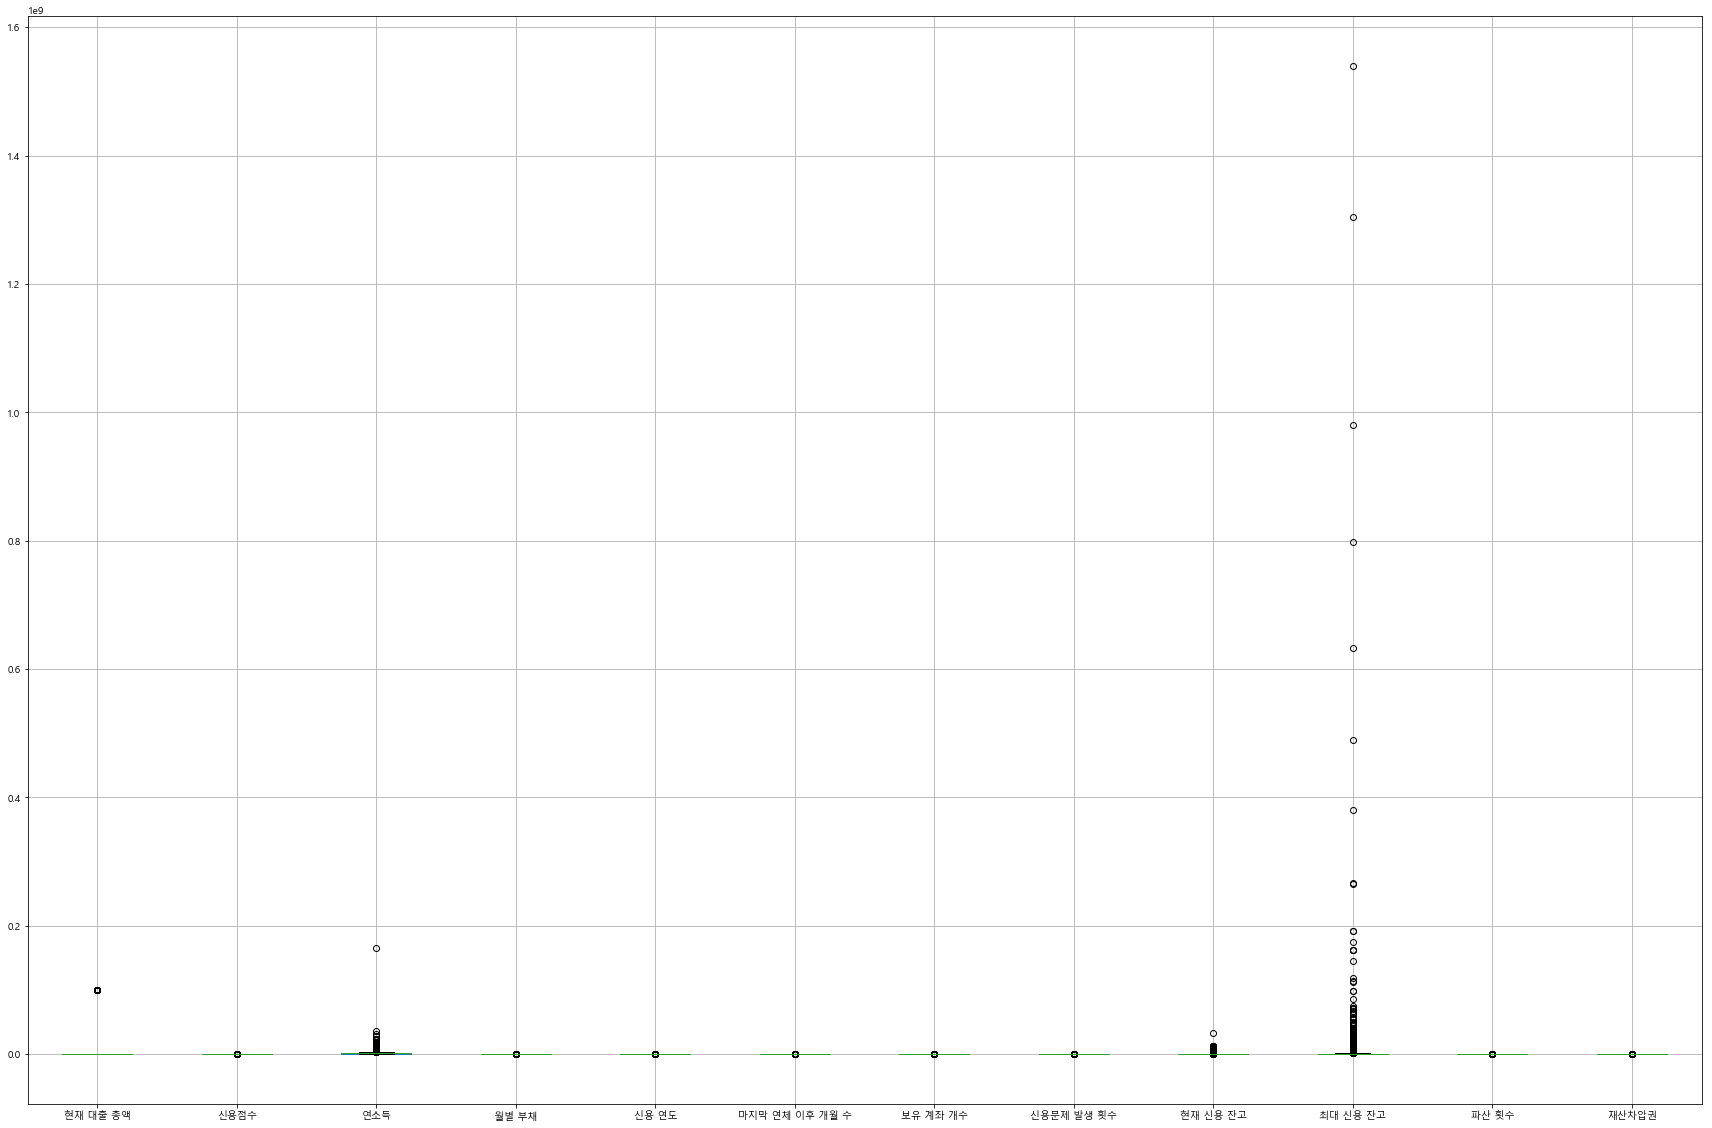

In [7]:
banktest.boxplot(figsize=(30,20))

## 3. 데이터 정제

### * 데이터 이상치 제거

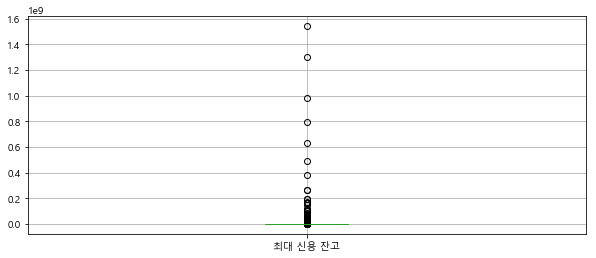

In [8]:
banktest.boxplot(column="최대 신용 잔고", figsize=(10,4))

In [9]:
banktest["최대 신용 잔고"].max()
# banktest["Maximum Open Credit"].min()

1539737892.0

In [10]:
banktest[banktest["최대 신용 잔고"]==1539737892.0]

,대출 ID,고객 ID,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
30604,f02dc06f-30f4-4b1d-ba58-156c2f3bd33d,a5c22bae-59c4-4a6c-8f04-628a4dadef57,Fully Paid,757218,Long Term,729.0,3269805.0,< 1 year,Home Mortgage,Debt Consolidation,38147.82,19.8,NaN,16,0,2659544,1.539738e+09,0.0,0.0


In [11]:
banktest["최대 신용 잔고"].mean()

760798.381747635

In [12]:
banktest["최대 신용 잔고"][banktest["최대 신용 잔고"]>5737892.0]=760798.381747635

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 결측치 제거

In [13]:
# banktest["신용점수"].isnull() = banktest["신용점수"].mean()
banktest[["신용점수"]] = banktest[["신용점수"]].fillna(banktest[["신용점수"]].mean())

In [12]:
banktest[["연소득"]] = banktest[["연소득"]].fillna(banktest[["연소득"]].mean())

In [14]:
banktest[["마지막 연체 이후 개월 수"]] = banktest[["마지막 연체 이후 개월 수"]].fillna(banktest[["마지막 연체 이후 개월 수"]].mean())

In [15]:
banktest.isnull().sum()

대출 ID                 0
고객 ID                 0
대출 상태                 0
현재 대출 총액              0
기간                    0
신용점수                  0
연소득               19154
현직업 근속연수           4222
거주지 소유 여부             0
대출 목적                 0
월별 부채                 0
신용 연도                 0
마지막 연체 이후 개월 수        0
보유 계좌 개수              0
신용문제 발생 횟수            0
현재 신용 잔고              0
최대 신용 잔고              2
파산 횟수               204
재산차압권                10
dtype: int64

### 정제 데이터 프레임 생성

In [65]:
bankpuri = banktest.dropna(axis=0)

In [66]:
del bankpuri["대출 ID"]
del bankpuri["고객 ID"]

In [45]:
bankpuri.isnull().sum()

대출 상태             0
현재 대출 총액          0
기간                0
신용점수              0
연소득               0
현직업 근속연수          0
거주지 소유 여부         0
대출 목적             0
월별 부채             0
신용 연도             0
마지막 연체 이후 개월 수    0
보유 계좌 개수          0
신용문제 발생 횟수        0
현재 신용 잔고          0
최대 신용 잔고          0
파산 횟수             0
재산차압권             0
dtype: int64

In [19]:
df_bad = bankpuri[bankpuri["대출 상태"]==1]

In [29]:
df_bad

,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권


In [67]:
bankpuri["대출 상태"][bankpuri["대출 상태"]=="Charged Off"] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
bankpuri["대출 상태"][bankpuri["대출 상태"]!=1] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
bankpuri.tail(20)

,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
99972,0,328350,Long Term,704.0,2041740.0,5 years,Rent,other,32684.94,16.7,34.901321,9,0,120612,234322.0,0.0,0.0
99973,0,522610,Long Term,725.0,1026209.0,10+ years,Home Mortgage,Debt Consolidation,15307.54,29.4,34.901321,11,0,470250,821260.0,0.0,0.0
99974,0,330528,Short Term,731.0,1141824.0,10+ years,Rent,Debt Consolidation,13321.28,18.8,32.000000,3,0,55119,375364.0,0.0,0.0
99975,1,274076,Short Term,736.0,709650.0,10+ years,Rent,Debt Consolidation,4204.70,35.3,2.000000,13,0,102866,844712.0,0.0,0.0
99979,0,766392,Short Term,717.0,1891070.0,7 years,Home Mortgage,Debt Consolidation,41130.82,15.4,34.901321,20,1,604485,969430.0,1.0,0.0
99980,0,336776,Short Term,745.0,1192459.0,10+ years,Home Mortgage,Debt Consolidation,31600.04,16.9,34.901321,14,0,347643,888558.0,0.0,0.0
99981,1,666666,Short Term,725.0,3838380.0,7 years,Home Mortgage,Debt Consolidation,48939.44,12.4,13.000000,18,0,507414,1004322.0,0.0,0.0
99983,0,758450,Short Term,726.0,1590775.0,10+ years,Home Mortgage,Debt Consolidation,24259.39,18.1,25.000000,11,0,850820,1287792.0,0.0,0.0
99984,0,347468,Short Term,691.0,1192307.0,10+ years,Rent,Debt Consolidation,30204.87,21.9,34.901321,17,0,331474,433686.0,0.0,0.0
99985,0,179454,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.000000,25,0,387410,1705616.0,0.0,0.0


In [24]:
bankpuri_dummy = pd.get_dummies(bankpuri)

### 이산형 데이터 추출

In [46]:
df_bad_num = bankpuri.select_dtypes(exclude = "object")
df_bad_num.head()

,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
0,445412,709.0,1167493.0,5214.74,17.2,34.901321,6,1,228190,416746.0,1.0,0.0
2,99999999,741.0,2231892.0,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0
3,347666,721.0,806949.0,8741.90,12.0,34.901321,9,0,256329,386958.0,0.0,0.0
5,206602,7290.0,896857.0,16367.74,17.3,34.901321,6,0,215308,272448.0,0.0,0.0
6,217646,730.0,1184194.0,10855.08,19.6,10.000000,13,1,122170,272052.0,1.0,0.0


### 범주형 데이터 추출

In [47]:
df_bad_char = bankpuri.select_dtypes(include = "object")
df_bad_char.head()

,대출 상태,기간,현직업 근속연수,거주지 소유 여부,대출 목적
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation
5,Charged Off,Short Term,10+ years,Home Mortgage,Debt Consolidation
6,Fully Paid,Short Term,< 1 year,Home Mortgage,Debt Consolidation


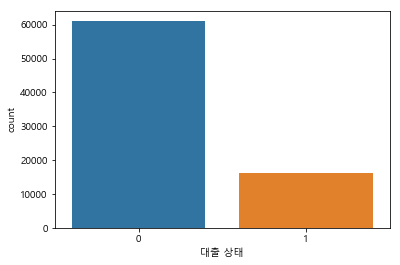

In [34]:
#df_char["대출 상태"]
sns.countplot(bankpuri["대출 상태"])

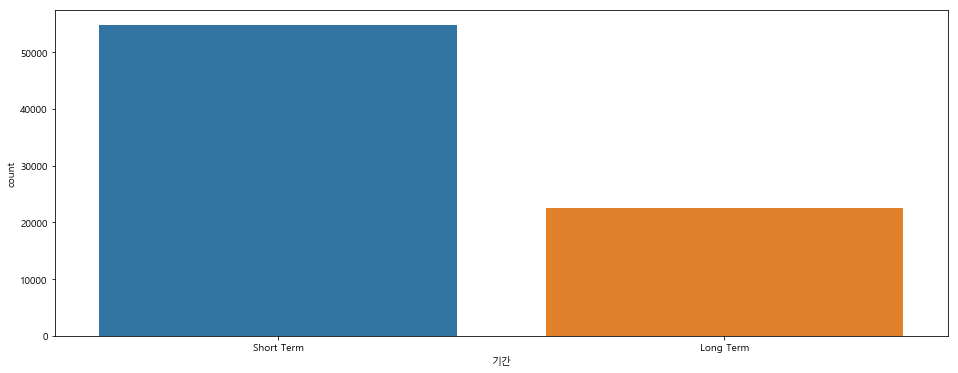

In [35]:
plt.figure(figsize=(16, 6))
sns.countplot(bankpuri["기간"])

In [31]:
from sklearn.preprocessing import scale, minmax_scale, robust_scale
df_scale_num = scale(df_bad_num)

In [71]:
bankpuri.to_csv("dataset/credit_train_puri.csv",index=False)

In [72]:
bankpuri = pd.read_csv("dataset/credit_train_puri.csv")

In [73]:
bankpuri

,대출 상태,현재 대출 총액,기간,신용점수,연소득,현직업 근속연수,거주지 소유 여부,대출 목적,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
0,0,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,34.901321,6,1,228190,416746.0,1.0,0.0
1,0,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.000000,18,1,297996,750090.0,0.0,0.0
2,0,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,34.901321,9,0,256329,386958.0,0.0,0.0
3,1,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,34.901321,6,0,215308,272448.0,0.0,0.0
4,0,217646,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.000000,13,1,122170,272052.0,1.0,0.0
5,0,548746,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.000000,4,0,437171,555038.0,0.0,0.0
6,0,215952,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,34.901321,20,0,669560,1021460.0,0.0,0.0
7,0,99999999,Short Term,728.0,714628.0,3 years,Rent,Debt Consolidation,11851.06,16.0,76.000000,16,0,203965,289784.0,0.0,0.0
8,0,99999999,Short Term,740.0,776188.0,< 1 year,Own Home,Debt Consolidation,11578.22,8.5,25.000000,6,0,134083,220220.0,0.0,0.0
9,0,99999999,Short Term,743.0,1560907.0,4 years,Rent,Debt Consolidation,17560.37,13.3,34.901321,10,1,225549,496474.0,1.0,0.0


In [60]:
del bankpuri["Unnamed: 0"]

## 4. 탐색적 분석

In [81]:
df_bad = bankpuri[bankpuri["대출 상태"]==1]
df_good = bankpuri[bankpuri["대출 상태"]==0]

Text(0.5, 1.0, '고객의 대출목적')

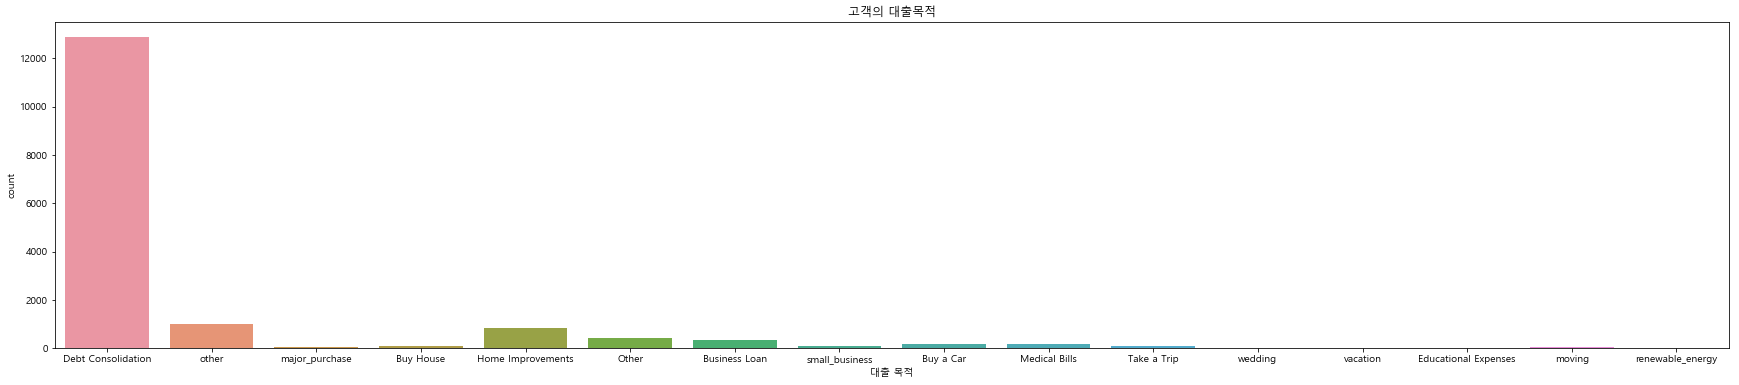

In [80]:
plt.figure(figsize=(30, 6))
sns.countplot(df_bad['대출 목적'])
plt.title("고객의 대출목적")

In [78]:
bankpuri['대출 목적'].count()

77271

신용불량 고객의 대출목적의 가장1순위는 "Debt Consolidation", 2순위는 "Home Improvements" 이었다.

### 상관관계 분석

In [31]:
# 목표변수와 설명변수의 상관계수
bankpuri.corr(method = "pearson").round(3)

,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
현재 대출 총액,1.000,-0.096,0.012,-0.011,0.022,0.009,-0.001,-0.006,0.003,0.026,-0.003,-0.005
신용점수,-0.096,1.000,-0.015,-0.001,-0.012,-0.002,0.008,-0.002,0.000,-0.016,-0.007,0.006
연소득,0.012,-0.015,1.000,0.479,0.179,-0.045,0.140,-0.011,0.310,0.281,-0.042,0.043
월별 부채,-0.011,-0.001,0.479,1.000,0.220,-0.040,0.408,-0.048,0.483,0.399,-0.072,0.022
신용 연도,0.022,-0.012,0.179,0.220,1.000,-0.030,0.142,0.057,0.213,0.264,0.058,0.018
마지막 연체 이후 개월 수,0.009,-0.002,-0.045,-0.040,-0.030,1.000,-0.020,0.078,-0.015,-0.020,0.089,0.009
보유 계좌 개수,-0.001,0.008,0.140,0.408,0.142,-0.020,1.000,-0.010,0.225,0.394,-0.018,0.005
신용문제 발생 횟수,-0.006,-0.002,-0.011,-0.048,0.057,0.078,-0.010,1.000,-0.108,-0.122,0.748,0.590
현재 신용 잔고,0.003,0.000,0.310,0.483,0.213,-0.015,0.225,-0.108,1.000,0.571,-0.119,-0.015
최대 신용 잔고,0.026,-0.016,0.281,0.399,0.264,-0.020,0.394,-0.122,0.571,1.000,-0.135,-0.014


In [65]:
# 목표변수와 설명변수의 상관계수
df_bad.corr(method = "pearson").round(3)

,현재 대출 총액,신용점수,연소득,월별 부채,신용 연도,마지막 연체 이후 개월 수,보유 계좌 개수,신용문제 발생 횟수,현재 신용 잔고,최대 신용 잔고,파산 횟수,재산차압권
현재 대출 총액,1.000,-0.001,0.208,0.438,0.183,-0.027,0.192,-0.039,0.292,0.372,-0.076,0.040
신용점수,-0.001,1.000,0.008,-0.008,0.001,0.003,0.005,-0.002,0.009,-0.001,-0.003,0.004
연소득,0.208,0.008,1.000,0.286,0.087,-0.024,0.078,0.013,0.148,0.150,-0.019,0.044
월별 부채,0.438,-0.008,0.286,1.000,0.202,-0.040,0.391,-0.017,0.428,0.395,-0.054,0.040
신용 연도,0.183,0.001,0.087,0.202,1.000,-0.031,0.135,0.064,0.201,0.267,0.066,0.020
마지막 연체 이후 개월 수,-0.027,0.003,-0.024,-0.040,-0.031,1.000,-0.014,0.043,-0.005,-0.018,0.064,-0.011
보유 계좌 개수,0.192,0.005,0.078,0.391,0.135,-0.014,1.000,0.002,0.219,0.407,-0.005,0.010
신용문제 발생 횟수,-0.039,-0.002,0.013,-0.017,0.064,0.043,0.002,1.000,-0.088,-0.099,0.717,0.620
현재 신용 잔고,0.292,0.009,0.148,0.428,0.201,-0.005,0.219,-0.088,1.000,0.561,-0.100,-0.011
최대 신용 잔고,0.372,-0.001,0.150,0.395,0.267,-0.018,0.407,-0.099,0.561,1.000,-0.119,-0.004


### 산점도 분석

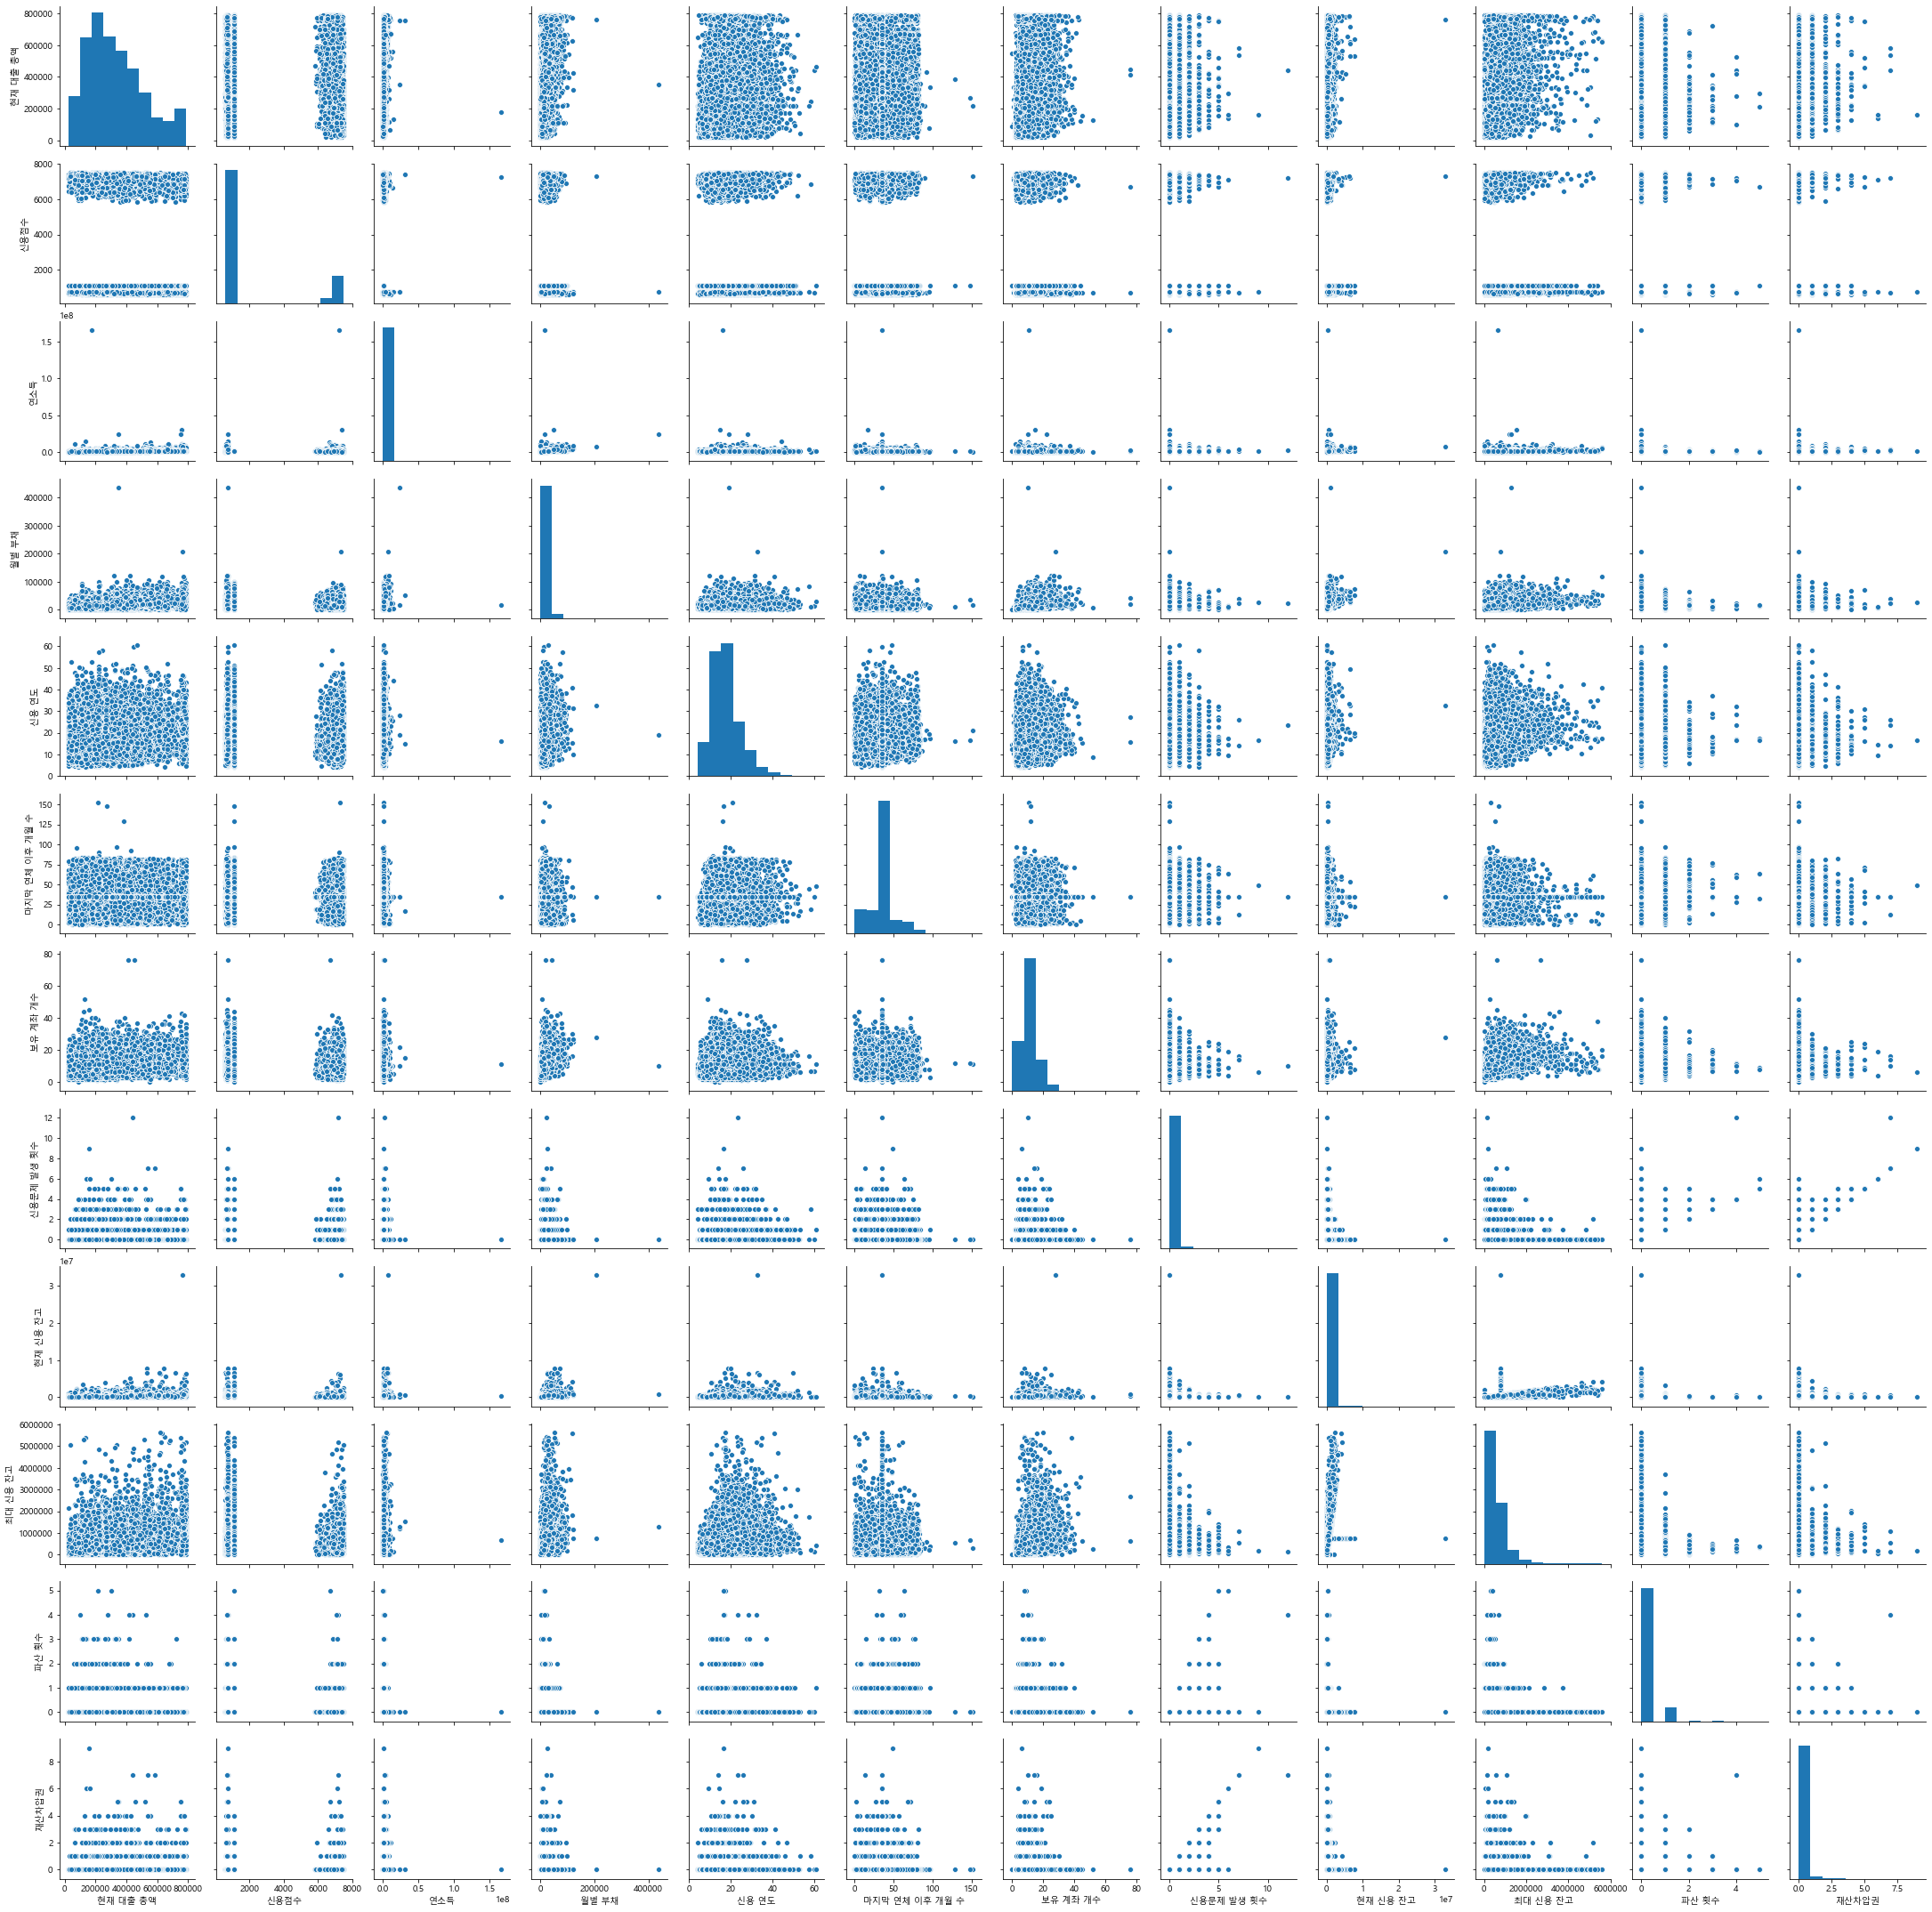

In [33]:
sns.pairplot(df_bad)